# <center>**Restaurant Location Analysis**</center>

##  <center>*IBM Applied Data Science Capstone*</center>

###  <center>By: Luanluan Xu</center> 

###  <center>July, 2019</center> 

## Table of contents
* [1.Introductiion ](#Introduction)
* [2.Data Section ](#data)
* [3.Methodology](#methodology)
* [4.Exploratory Data Analysis](#analysis)
* [5.Results and Discussion](#results)
* [6.Conclusion](#conclusion)

<span id=”2.DataSection”>名称 

##  1.  Introduction

As a Chinese proverb goes, food is the first necessity of the people, food is the most basic conditions for survival. This shows the importance of eating to human beings. Three meals a day are indispensable. However, with the speeding pace of life and high intensity work under pressure in the modern society,  spending a lot of time and energy to cook at home has become a luxury. More and more people choose to eat out or increase the frequency of eating out. Especially in modern metropolises like New York City, restaurants are everywhere, opening and closing every day. But why some restaurants after opening can be filled with customers and make a lot of money, while others have slow bussiness. Location is one of the important factors.

### 1.1 Bussiness Problem

So how to decide a location-selection? That is the question to be answered in this project. Based on the data of 2,711 restaurants in five Boroughs of New York City, It aims to study the influence of household income level, population density, existing competitors and other factors on the location-selection，and find out the patterns.

### 1.2  Targeted Audiences

This report is intended for owners or investors who want to open a restaurant. A good location is helpful to bring more customers and more sales for a restaurant. The report will be used as evaluation criteria and scientific suggestions for location-selection.

## 2. Data Section

### 2.1 Data Requirement and Collection

For the project, those data are needed:

1) Neighborhoods in New York City
From Module 3 in this course, we can get 5 boroughs in NYC and 306 neighborhoods that exist in each borough as well as the latitude and longitude coordinates of each neighborhood, I have saved it to dy_newyork.csv.

2) Restaurants in New York City
Use the Foursquare API to explore the neighborhoods and get all the venues data. We only need the restaurants data, so I just filter the data that the venue category contains 'Restaurant'.  

3) Population density by Neighborhoods
a Wikipedia page ("https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City ") has those information. I scraped the page and get the data.

4) Median Household Income by Neighborhoods
Those data can be found in a web page (https://ny.curbed.com/2017/8/4/16099252/new-york-neighborhood-affordability), I downloaded them and had saved to 'Household_income_By_Neighborhoods_NYC.csv'.



### 2.1 Data Cleaning and Preparation

I clean the data and drop some features that I think they useless or irrelevant. For example, I drop two features, area and population by Community Board(CB) in the table- ‘Population density by Neighborhoods’, because in order to maintain data consistency, we only need the data by neighborhoods. 

There are several problems in the cleaning process.

1) Because the original population density is calculated by community board, some neighborhoods in the same board are in the same cell. I split them and make sure they can be combined with Foursquare location data.

2) There are 2155 population density data and 861 median household income data missed in a total of 2698 restaurant samples. Those data is too much to be ignored, so I give them the data by borough which is the mean of data by neighborhoods instead.

3) Some restaurants have opened another store in the same or different neighborhood, this is an independent sample, but it may result in an error. So I combine the restaurant name with 'index' to give every restaurant a unique name. 

4) Competitors around the location can divert customers, but I can't find such data online. So I build a new feature named competitors which is the number of restaurants in the same neighborhood.

Now, data from all sources are combined into one table. There are 2698 restaurant samples and 11 features.


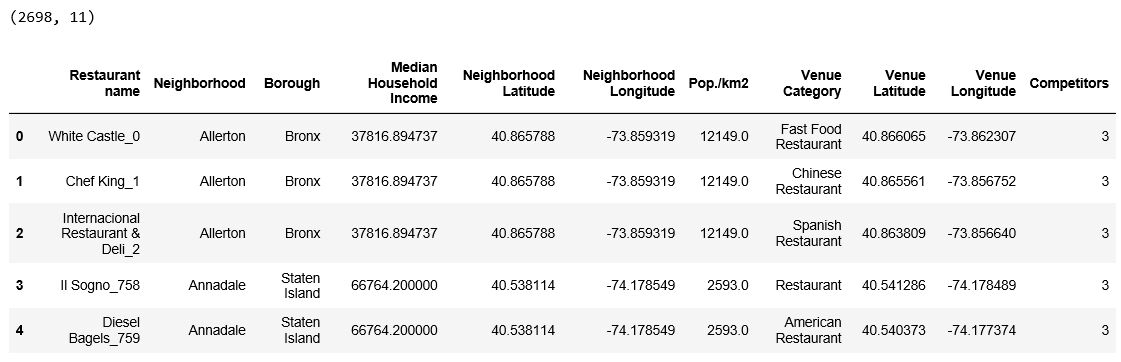

### 3.Methodology

In this project, I do some basic exploratory data analysis, find the patterns, and give a conclusion.

First,I use k-means for restaurants segementation and show all restaurants in NYC in the map, analyze individual feature patterns using visualization, Pearson Correlation Coefficient and P-value. As a result, the correlation between 'Median Household Income', 'Population density' and 'Competitors' is statistically significant, although the linear relationship isn't extremely strong. So I filter the neighborhoods with 'Median Household Income' and 'Population density' higher than 75% and 'Competitors' less than mean, 8 out of 306 neighborhoods are chosen.

Second, according to data analysis, there are opportunities for one or more new restaurant in those neighborhoods, but many other factors should be considered. In results section, we will discuss about this with an example.


## 4. Exploratory Data Analysis

#### 4.1 Using *k*-means for Restaurants Segmentation

In the original database, we have 11 features. Here I create a new dataframe- 'df1' for clustering, which only contains 4 features: 'Restaurant name', 'Median Household Income', 'Population density(Pop./km2)' and 'Competitors'. First, normalize the dataset. Second, run k-means to cluster the restaurants into 5 clusters. Finally, visualize the resulting clusters.

![resmap_clusters.html](attachment:resmap_clusters.html )


From the map, we can see there are more competitors in some area, while there are less in others. But what's the relationship between 'Competitors' and other variables? Let's find out.


#### 4.2 Analyzing Individual Feature Patterns using Visualization
In this section, I plot a scater diagram and 3 histograms and try to find the patterns between virables.

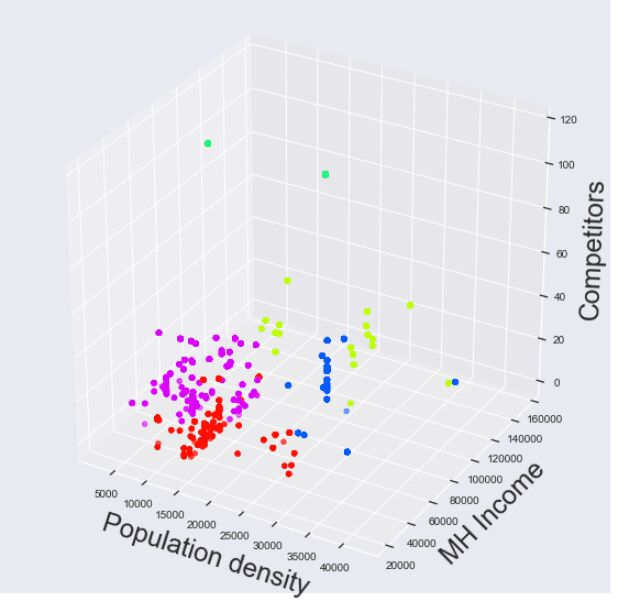

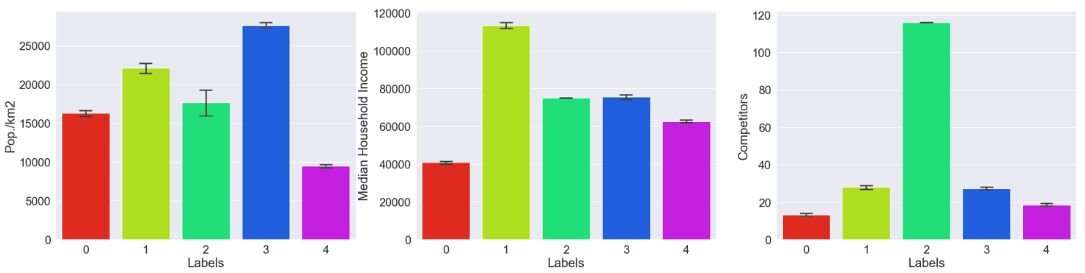

From the figures, cluser 5('Lables'==4) have the lowest population density, and cluser 1 ('Lables'==0) have the lowest Median Household Income, they have less Competiors too. 
what's the relationships between Median Household Income, Population density and Competitors? Let's continue analyzing.

### 4.3 Neighborhoods analysis

In order to find the patterns, I create a new dataframe called 'df_nei', which contains 4 features: 'Neighborhood', 'Median Household Income', 'Pop./km2', 'Competitors'(number of restaurants in the neighborhood).

Let's first take a look at the variables by utilizing a description method.

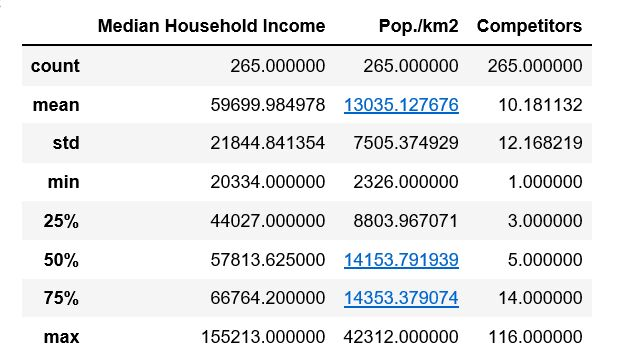


Then, calculate the Pearson Correlation Coefficient and P-value between variables.

#### a.  Median Household Income VS Competitors

The Pearson Correlation Coefficient is 0.35382224007643276 with a P-value of P = 3.116191157395683e-09.
Since the p-value is << 0.001, the correlation between Median Household Income and Competitors is statistically significant, although the linear relationship isn't extremely strong (~0.35).
From the 2D Scater-plot, we can see that when the neighborhood tends to have more competitors with a higher Median Household Income.

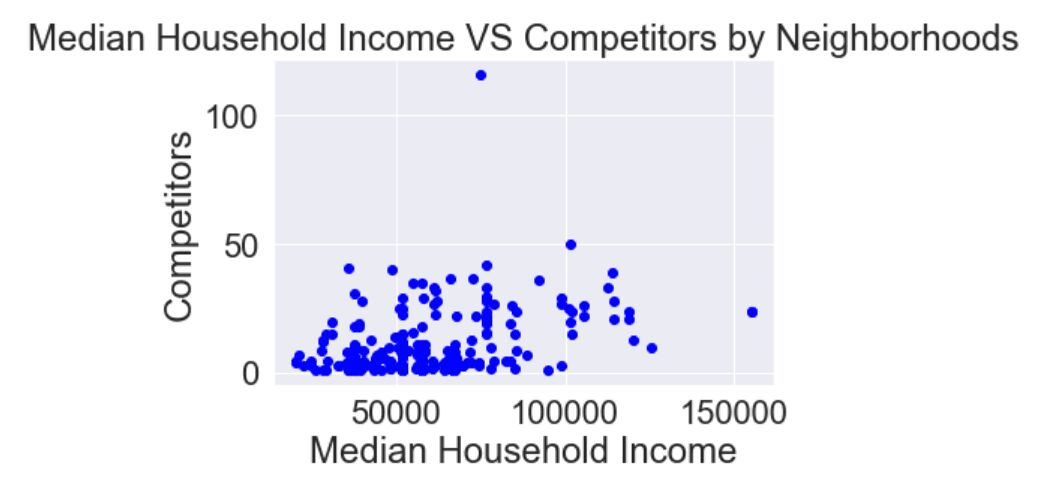

#### b. Population density VS Competitors

The Pearson Correlation Coefficient is 0.40623520501505717 with a P-value of P = 5.953356640995321e-12. 
Since the p-value is << 0.001, the correlation between Population density and Competitors is statistically significant, although the linear relationship isn't extremely strong (~0.41).
From the plot, less obviously with noise wich is caused by the missing information, competitors tend to rise as the population density increases.

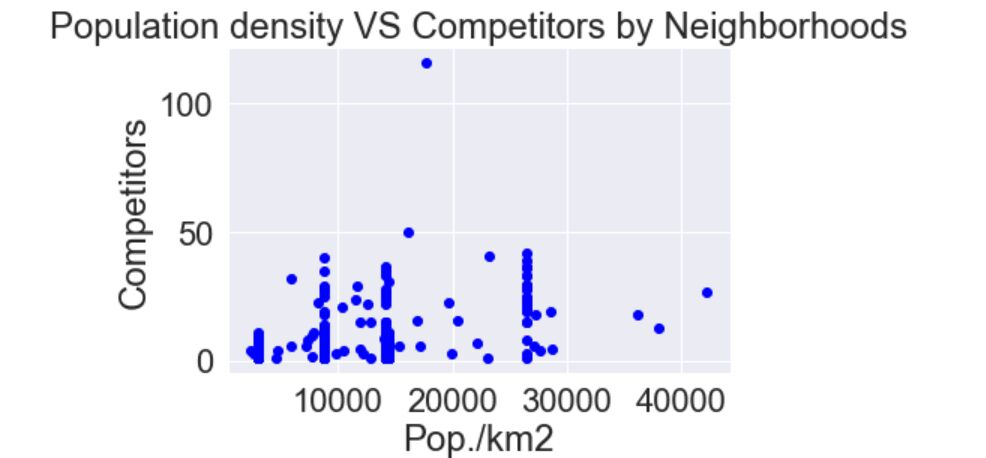

Let's find the neighborhoods which have Median Household Income > 66764(75%) and Population density > 14353(75%) but Competitor < 11(mean=10.18). 
8 neighborhoods are chosen. They have higher Median Household Income and Population density, but number of restaurant is fewer than mean. That means their market consumption capacity is undervalued currently comparing to other neighborhoods.
Logically, there should be more opportunities in those area than others for one or more new restaurants.

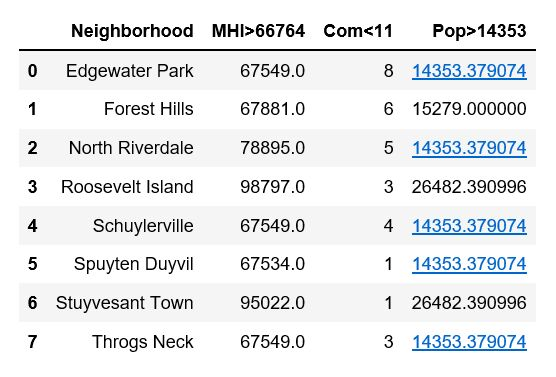

There are 31 restaurants in those neighborhoods. Let's visualize them by Folium.

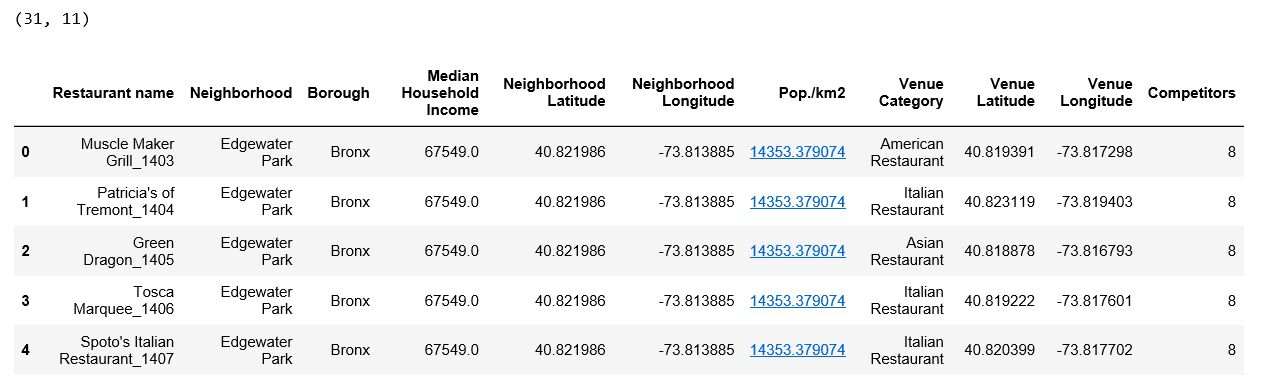

show map here

### 5.Results and Discussion

According to data analysis, we have found 8 neighborhoods that may have opportunities for one or more new restaurants. In fact, there are stil many other factors to be considered while deciding a location selection. 

For example, if the owner wants to open a Italian restaurant. Edgewater Park is not a good neighborhood to choose. Because there have been 4 Italian Restaurants in this area. It's better to choose from the rest.

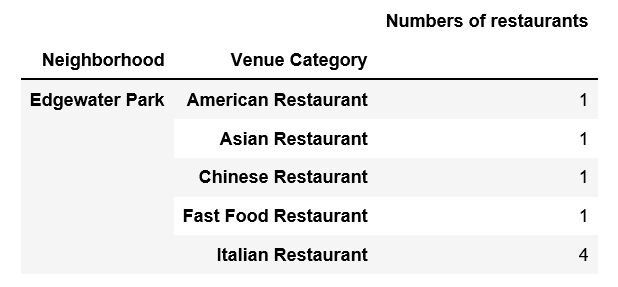

### 4.Conclusion

Overall, location selection is a very complicated process. There are many considerations that should be made in the selection.
According to this report, 8 out of 306 neighborhoods are recommended to owners or investors who want to open a restaurant. Although it can't give the exact location, it helps to narrow it down!